# PISA 2012 Dataset Exploration 
## by Maryse Bonhomme

## Preliminary Wrangling

> PISA is the OECD's Program for International Students Assessment. The dataset that will be used today for analysis is the PISA 2012 survey, assessing 15 years old from 65 countries in  reading, mathematics and science.  And ultimately measure how well, those children are prepared for the future. <br>
The PISA survey is conducted every 3 years. we are using the responses from the PISA 2012 survey. <br>
That survey covered many areas of the 15 years old life, asking questions about life at school and also outside school.<br>
The results this huge dataset with more than 600  variables and responses from almost 510, 000 students ( 485490 rows are part of this dataset).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("darkgrid")

%matplotlib inline

> *Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.
The dataset covers a broad areas of the 15 years old. As part of the analysis today, I will focus  on the following questions:*
* How does do Students who uses the internet at home differs from children who don't use internet at home in terms of scores? 
* How do children who reported playing video games compares to the one who don't? 
* I was also very interested by the cognitive activation section of the survey. how do children who reports being always encouraged to finding their own formulation to problems compares to those who are not really encouraged to do so?
* finally, how do non OECD and OECD countries perform in Math, science and reading? 
* Do boys and girls perform in the same ways on test, in OECD and non-OECD countries? 
<hr>
* what is the distribution of scores in Math, reading and science <br>
* Which countries perform best in each category?  <br>
* since in real life, the ability to adapt to new context is crucial, I was very interested in the cognitive activation section of the survey. in which countries are children most encouraged to find to think on their own, are given the freedom to explore different ways of finding answers. <br>

of course this is a survey and what we are measuring is the perception those 15 years old have of being encouraged to  think more deeply about what they have learning in school. and ultimalty might make them more intelligent. 
In many educational system, academy success does not depend only on the ability to understand but also on other abilities like the ability to memorize for example. <br>
I am personally convinced that in real life, that ability is crucial. but in this analysis, I am interested in understanding if there is any correlation with scores. 

<hr> 



In [2]:
#loading the dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('pisa2012.csv',encoding='cp1252')

C:\Users\marys\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# using panda's sample to visually check the data
df.sample(10)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,ST88Q03,ST88Q04,ST89Q02,ST89Q03,ST89Q04,ST89Q05,ST91Q01,ST91Q02,ST91Q03,ST91Q04,ST91Q05,ST91Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST94Q05,ST94Q06,ST94Q09,ST94Q10,ST94Q14,ST96Q01,ST96Q02,ST96Q03,ST96Q05,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC01Q09,IC01Q10,IC01Q11,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC02Q06,IC02Q07,IC03Q01,IC04Q01,IC05Q01,IC06Q01,IC07Q01,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC08Q06,IC08Q07,IC08Q08,IC08Q09,IC08Q11,IC09Q01,IC09Q02,IC09Q03,IC09Q04,IC09Q05,IC09Q06,IC09Q07,IC10Q01,IC10Q02,IC10Q03,IC10Q04,IC10Q05,IC10Q06,IC10Q07,IC10Q08,IC10Q09,IC11Q01,IC11Q02,IC11Q03,IC11Q04,IC11Q05,IC11Q06,IC11Q07,IC22Q01,IC22Q02,IC22Q04,IC22Q06,IC22Q07,IC22Q08,EC01Q01,EC02Q01,EC03Q01,EC03Q02,EC03Q03,EC03Q04,EC03Q05,EC03Q06,EC03Q07,EC03Q08,EC03Q09,EC03Q10,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,EC05Q01,EC06Q01,EC07Q01,EC07Q02,EC07Q03,EC07Q04,EC07Q05,EC08Q01,EC08Q02,EC08Q03,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUD

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB


In [5]:
df.shape

(485490, 636)

### What is the structure of your dataset?

> The PISA dataset is a dataset with 636 columns and 495 489 rows. 

### What is/are the main feature(s) of interest in your dataset?

> **_Video Game and Internet users Score_**: With the internet and video games being constantly critized for kids, I am really interested in observing if there any correlation between using the internet or playing video games and scores obtained. <br>
> **_In term of cognitive Activation_**: Is there any correlation between children who are encouraged to think for themselves about problems, instead of being asking questions with obvious questions. <br>
> **_Scores _**:Is there a difference in averages scores, for OECD and non OECD countries? 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> In order to find answers to those questions, I will keep informations on countries, respondents gender, cognitive activations questions and of course score. without forgetting responses on internet and video games. 
Below I am going to reduce the  original dataframe to only the column needed. 

<hr>

1. which countries have the highest sucess rates in term of scores in Math, Reading and Science? 
2. Do girls and boys succeed in the same way? 
3. do OCD and non OECD countries perform in the same way?
4. finally which countries give priority in their education system to cognitive activation? blabla
5. are this countries the best performing in test?  test or method
6. in term of cognition responses, is there a difference between boys and girls?

In [27]:
wanted_columns = ['CNT','OECD','ST01Q01','ST02Q01', 'ST04Q01','ST28Q01','ST53Q01','ST53Q02','ST80Q01','ST80Q04','ST80Q05',
                  'ST80Q06','ST80Q07', 'ST80Q08', 'ST80Q09', 'ST80Q10', 'ST80Q11','TIMEINT','PV1MATH','PV2MATH','PV3MATH',
                  'PV4MATH','PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ',
                  'PV5READ', 'PV1SCIE', 'PV2SCIE','PV3SCIE', 'PV4SCIE','PV5SCIE']

In [28]:
df_selected = df[wanted_columns].copy()

In [29]:
df_selected.sample(5)

,CNT,OECD,ST01Q01,ST02Q01,ST04Q01,ST28Q01,ST53Q01,ST53Q02,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,TIMEINT,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
268604,Italy,OECD,10,1.0,Female,101-200 books,NaN,NaN,Often,Sometimes,Sometimes,Often,Never or rarely,Sometimes,Sometimes,Often,Sometimes,19.0,491.7511,440.3412,526.0243,479.2881,467.6040,548.2368,483.1034,531.5563,507.7270,546.6482,555.8001,516.6356,534.3529,535.2853,507.3107
484343,Vietnam,Non-OECD,10,2.0,Female,26-100 books,Most important,Improve understanding,Often,Often,Sometimes,Never or rarely,Often,Always or almost always,Often,Often,Often,NaN,476.0944,452.7263,441.0422,480.7680,460.5157,586.5225,561.8989,537.2753,549.9843,603.9974,518.9668,559.9963,520.8318,533.8866,533.8866
305164,Luxembourg,OECD,9,2.0,Female,0-10 books,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.3708,457.6336,540.9799,526.9590,517.6118,520.6742,563.5670,510.3482,549.2694,535.7661,419.3771,469.7314,481.8538,393.2674,471.5964
34044,Australia,OECD,9,1.0,Female,11-25 books,by heart,check memory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,421.8804,424.9961,462.3851,481.0796,407.8595,448.0743,479.8467,517.1793,509.2362,479.0524,434.3902,456.7699,495.0019,495.9344,428.7952
339869,Mexico,OECD,10,8.0,Female,0-10 books,Most important,Improve understanding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,466.2019,458.4125,471.6545,475.5492,502.0330,464.0399,487.0749,477.5432,502.1668,504.5497,493.6964,504.8862,498.3588,528.1984,515.1436


In [30]:
# renaming the selected columns so that it is easier to understand
df_selected.rename(columns=
                   {'CNT':'country', 
                    'OECD':'OECD', 
                    'ST01Q01':'international_grade',
                    'ST02Q01':'national_study_program', 
                    'ST04Q01':'gender',
                    'ST28Q01':'number_books',
                    'ST53Q01':'Learning_strategies_1',
                    'ST53Q02':'Learning_strategies_2',
                    'ST80Q01':'CA_TeacherEncouragesToReflectProblems',
                    'ST80Q04':'CA_GivesProblemThatRequireToThink',
                    'ST80Q05':'CA_AsksToUseOwnProcedures',
                    'ST80Q06':'CA_PresentsProblemsWithNoObviousSolutions',
                    'ST80Q07':'CA_PresentsProblemsInDifferentContexts',
                    'ST80Q08':'CA_HelpsLearnFromMistakes',
                    'ST80Q09':'CA_AsksForExplanation',
                    'ST80Q10':'CA_ApplyWhatTheyLearned',
                    'ST80Q11':'CA_ProblemWithMultipleSolutions',
                    'TIMEINT':'Computer_time'}, inplace=True)

In [31]:
#checking if columns were renamed
df_selected.head(1)

,country,OECD,international_grade,national_study_program,gender,number_books,Learning_strategies_1,Learning_strategies_2,CA_TeacherEncouragesToReflectProblems,CA_GivesProblemThatRequireToThink,CA_AsksToUseOwnProcedures,CA_PresentsProblemsWithNoObviousSolutions,CA_PresentsProblemsInDifferentContexts,CA_HelpsLearnFromMistakes,CA_AsksForExplanation,CA_ApplyWhatTheyLearned,CA_ProblemWithMultipleSolutions,Computer_time,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
0,Albania,Non-OECD,10,1.0,Female,0-10 books,NaN,NaN,Always or almost always,Sometimes,Never or rarely,Always or almost always,Always or almost always,Always or almost always,Always or almost always,Often,Often,NaN,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.342,406.8496,175.7053,218.5981,341.7009,408.84,348.2283,367.8105,392.9877


Each score is represented five time for each participants. so I am going to calculate an average value for each score, it will be easier to work with only one value.

In [32]:
df_selected['math_average'] =  (df_selected['PV1MATH'] + df_selected['PV2MATH']+ 
                                df_selected['PV3MATH'] + df_selected['PV4MATH'] + df_selected['PV5MATH'])/5
df_selected['reading_average'] = (df_selected ['PV1READ'] + df_selected['PV2READ']+ 
                          df_selected['PV3READ'] + df_selected ['PV4READ'] + df_selected['PV5READ'])/5
df_selected['science_average'] = (df_selected['PV1SCIE'] + df_selected ['PV2SCIE']+ 
                          df_selected['PV3SCIE'] + df_selected['PV4SCIE'] + df_selected['PV5SCIE'])/5


In [33]:
df_selected.head(1)

,country,OECD,international_grade,national_study_program,gender,number_books,Learning_strategies_1,Learning_strategies_2,CA_TeacherEncouragesToReflectProblems,CA_GivesProblemThatRequireToThink,CA_AsksToUseOwnProcedures,CA_PresentsProblemsWithNoObviousSolutions,CA_PresentsProblemsInDifferentContexts,CA_HelpsLearnFromMistakes,CA_AsksForExplanation,CA_ApplyWhatTheyLearned,CA_ProblemWithMultipleSolutions,Computer_time,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,math_average,reading_average,science_average
0,Albania,Non-OECD,10,1.0,Female,0-10 books,NaN,NaN,Always or almost always,Sometimes,Never or rarely,Always or almost always,Always or almost always,Always or almost always,Always or almost always,Often,Often,NaN,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.342,406.8496,175.7053,218.5981,341.7009,408.84,348.2283,367.8105,392.9877,366.18634,261.01424,371.91348


In [39]:
#since I no longoer need the individuals values for the dataframe, I am going to simply drop them
df_selected.drop(['PV1MATH', 'PV2MATH','PV3MATH', 'PV4MATH','PV5MATH','PV1READ','PV2READ','PV3READ','PV4READ','PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], axis=1, inplace=True)

In [40]:
df_selected.head()

,country,OECD,international_grade,national_study_program,gender,number_books,Learning_strategies_1,Learning_strategies_2,CA_TeacherEncouragesToReflectProblems,CA_GivesProblemThatRequireToThink,CA_AsksToUseOwnProcedures,CA_PresentsProblemsWithNoObviousSolutions,CA_PresentsProblemsInDifferentContexts,CA_HelpsLearnFromMistakes,CA_AsksForExplanation,CA_ApplyWhatTheyLearned,CA_ProblemWithMultipleSolutions,Computer_time,math_average,reading_average,science_average
0,Albania,Non-OECD,10,1.0,Female,0-10 books,NaN,NaN,Always or almost always,Sometimes,Never or rarely,Always or almost always,Always or almost always,Always or almost always,Always or almost always,Often,Often,NaN,366.18634,261.01424,371.91348
1,Albania,Non-OECD,10,1.0,Female,201-500 books,relating to known,Improve understanding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470.56396,384.68832,478.12382
2,Albania,Non-OECD,9,1.0,Female,More than 500 books,Most important,Improve understanding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,505.53824,405.18154,486.60946
3,Albania,Non-OECD,9,1.0,Female,11-25 books,relating to known,new ways,Always or almost always,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Never or rarely,NaN,449.45476,477.46376,453.97240
4,Albania,Non-OECD,9,1.0,Female,101-200 books,NaN,NaN,Always or almost always,Often,Sometimes,Often,Often,Often,Always or almost always,Often,Often,NaN,385.50398,256.01010,367.15778


In [41]:
# I am now going to save the new dataframe to a csv file so that is quicker to laod 
df_selected.to_csv('PISA_cognition.csv', encoding='utf-8', index=False)

In [42]:
df_cognition = pd.read_csv('PISA_cognition.csv', encoding='utf-8')
df_cognition.head()

,country,OECD,international_grade,national_study_program,gender,number_books,Learning_strategies_1,Learning_strategies_2,CA_TeacherEncouragesToReflectProblems,CA_GivesProblemThatRequireToThink,CA_AsksToUseOwnProcedures,CA_PresentsProblemsWithNoObviousSolutions,CA_PresentsProblemsInDifferentContexts,CA_HelpsLearnFromMistakes,CA_AsksForExplanation,CA_ApplyWhatTheyLearned,CA_ProblemWithMultipleSolutions,Computer_time,math_average,reading_average,science_average
0,Albania,Non-OECD,10,1.0,Female,0-10 books,NaN,NaN,Always or almost always,Sometimes,Never or rarely,Always or almost always,Always or almost always,Always or almost always,Always or almost always,Often,Often,NaN,366.18634,261.01424,371.91348
1,Albania,Non-OECD,10,1.0,Female,201-500 books,relating to known,Improve understanding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470.56396,384.68832,478.12382
2,Albania,Non-OECD,9,1.0,Female,More than 500 books,Most important,Improve understanding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,505.53824,405.18154,486.60946
3,Albania,Non-OECD,9,1.0,Female,11-25 books,relating to known,new ways,Always or almost always,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Never or rarely,NaN,449.45476,477.46376,453.97240
4,Albania,Non-OECD,9,1.0,Female,101-200 books,NaN,NaN,Always or almost always,Often,Sometimes,Often,Often,Often,Always or almost always,Often,Often,NaN,385.50398,256.01010,367.15778


In [17]:
df_cognition['math_average'].isnull().sum().sum(), df_cognition['reading_average'].isnull().sum().sum(), df_cognition['science_average'].isnull().sum().sum()

(0, 0, 0)

In [51]:
df_cognition['Computer_time'].isnull().sum().sum(), OECD['Computer_time'].isnull().sum().sum(), Non_OECD['Computer_time'].isnull().sum().sum()

(188416, 60938, 127478)

In [57]:
male['Computer_time'].isnull().sum().sum(), female['Computer_time'].isnull().sum().sum()

(93000, 95416)

In [46]:
cognitive activation

,country,OECD,international_grade,national_study_program,gender,number_books,Learning_strategies_1,Learning_strategies_2,CA_TeacherEncouragesToReflectProblems,CA_GivesProblemThatRequireToThink,CA_AsksToUseOwnProcedures,CA_PresentsProblemsWithNoObviousSolutions,CA_PresentsProblemsInDifferentContexts,CA_HelpsLearnFromMistakes,CA_AsksForExplanation,CA_ApplyWhatTheyLearned,CA_ProblemWithMultipleSolutions,Computer_time,math_average,reading_average,science_average
0,Albania,Non-OECD,10,1.0,Female,0-10 books,NaN,NaN,Always or almost always,Sometimes,Never or rarely,Always or almost always,Always or almost always,Always or almost always,Always or almost always,Often,Often,NaN,366.18634,261.01424,371.91348
1,Albania,Non-OECD,10,1.0,Female,201-500 books,relating to known,Improve understanding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470.56396,384.68832,478.12382
2,Albania,Non-OECD,9,1.0,Female,More than 500 books,Most important,Improve understanding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,505.53824,405.18154,486.60946
3,Albania,Non-OECD,9,1.0,Female,11-25 books,relating to known,new ways,Always or almost always,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Never or rarely,NaN,449.45476,477.46376,453.97240
4,Albania,Non-OECD,9,1.0,Female,101-200 books,NaN,NaN,Always or almost always,Often,Sometimes,Often,Often,Often,Always or almost always,Often,Often,NaN,385.50398,256.01010,367.15778
5,Albania,Non-OECD,9,1.0,Female,0-10 books,relating to known,new ways,NaN,Often,Often,Sometimes,Never or rarely,Often,Always or almost always,Always or almost always,Often,NaN,365.17370,337.42688,375.55018
6,Albania,Non-OECD,10,1.0,Female,0-10 books,by heart,check memory,Always or almost always,Always or almost always,Often,Often,Sometimes,Always or almost always,Always or almost always,Sometimes,Always or almost always,NaN,490.11528,372.13824,491.17866
7,Albania,Non-OECD,10,1.0,Male,26-100 books,NaN,NaN,Never or rarely,Sometimes,NaN,Always or almost always,Sometimes,Always or almost always,Always or almost always,Sometimes,Always or almost always,NaN,542.14830,516.59478,559.06378
8,Albania,Non-OECD,9,1.0,Female,26-100 books,NaN,NaN,Often,Always or almost always,Often,Always or almost always,Sometimes,Always or almost always,Always or almost always,Always or almost always,Always or almost always,NaN,408.71634,326.78312,371.72698
9,Albania,Non-OECD,10,1.0,Female,11-25 books,relating to known,new ways,Often,Sometimes,Sometimes,Never or rarely,Often,Always or almost always,Always or almost always,Often,Often,NaN,433.87600,401.92486,342.16710


In [65]:
#proportion of OECD and non OECD respondents
OECD = df_cognition.query('OECD == "OECD"')
Non_OECD = df_cognition.query('OECD=="Non-OECD"')
male= df_cognition.query('gender=="Male"')
female = df_cognition.query('gender=="Female"')
OECD.shape[0], Non_OECD.shape[0], male.shape[0], female.shape[0]

(295416, 190074, 240426, 245064)

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.m

## Average Scores for Math, Reading and Science
In general students equally succeed in the fields of Math, Reading and Science. <br>
There is no field where the average score is significally higher or smaller than the others. 

In [47]:
df_cognition['math_average'].mean(), df_cognition['reading_average'].mean(), df_cognition['science_average'].mean()

(469.65123385442615, 472.0069640898506, 475.80809403002854)

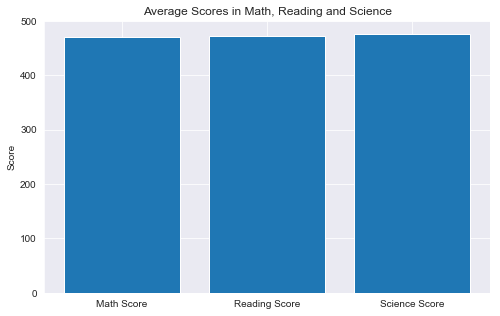

In [66]:
plt.figure(figsize=[8,5])
# plotting Math, Reading and Science Score to see if children tends to succeed more in one  
labels = ["Math Score", "Reading Score", "Science Score"]
usage = [df_cognition['math_average'].mean(),df_cognition['reading_average'].mean(), df_cognition['science_average'].mean()]

# Generating the y positions. Later, we'll use them to replace them with labels.
y_positions = range(len(labels))

# Creating our bar plot
plt.bar(y_positions, usage)
plt.xticks(y_positions, labels)
plt.ylabel("Score")
plt.title("Average Scores in Math, Reading and Science")
plt.show()

## Proportions of OECD and Non_OECD Countries that particapated in the survey

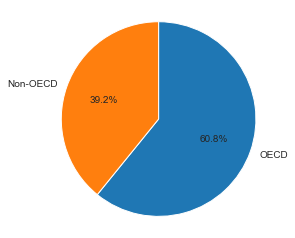

In [21]:
# code for the pie chart seen above
sorted_counts = df_cognition['OECD'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,autopct='%1.1f%%',
        counterclock = False);
plt.axis('square');

## Proportion of Boys and Female Students in the survey

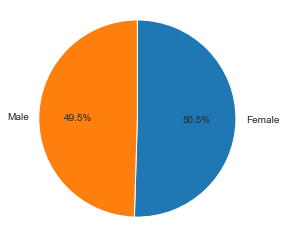

In [22]:
# code for the pie chart seen above
sorted_counts = df_cognition['gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,autopct='%1.1f%%',
        counterclock = False);
plt.axis('square');

## Scores Distribution for OECD and Non_OECD Countries

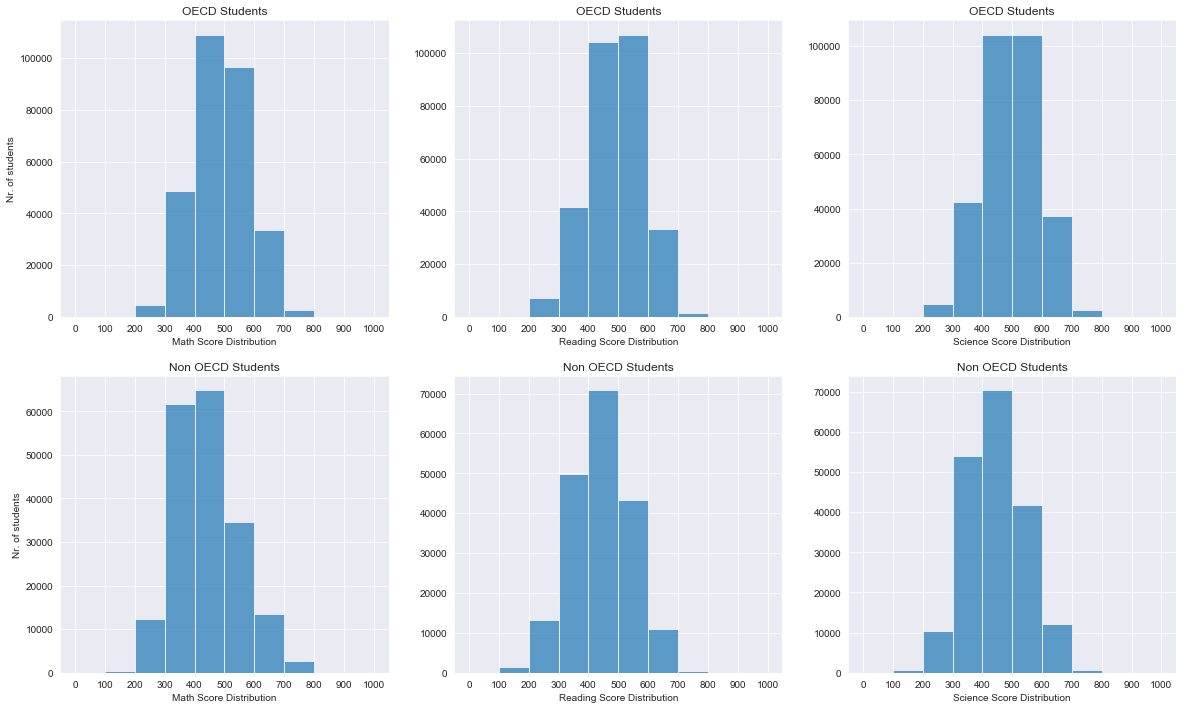

In [78]:
plt.figure(figsize = [20, 12])

bins_hist = np.arange(0, 1000 + 1, 100)
# 1st row  (OECD Countries)
plt.subplot(2, 3, 1)
plt.hist(OECD['math_average'], bins = bins_hist, alpha = 0.7);

plt.xticks(bins_hist)
plt.xlabel('Math Score Distribution');
plt.ylabel('Number of students')
plt.title("OECD Students");

plt.subplot(2, 3, 2)
plt.hist(OECD['reading_average'], bins = bins_hist,  alpha = 0.7);

plt.xticks(bins_hist)
plt.xlabel('Reading Score Distribution');
plt.title("OECD Students");

plt.subplot(2, 3, 3)
plt.hist(OECD['science_average'], bins = bins_hist, alpha = 0.7);

plt.xticks(bins_hist)
plt.xlabel('Science Score Distribution');
plt.title("OECD Students");

# 2nd row (Non OECD Countries)

plt.subplot(2, 3, 4)
plt.hist(Non_OECD['math_average'], bins = bins_hist, alpha = 0.7);

plt.xticks(bins_hist)
plt.xlabel('Math Score Distribution');
plt.ylabel('Number of students')
plt.title("Non OECD Students");

plt.subplot(2, 3, 5)
plt.hist(Non_OECD['reading_average'], bins = bins_hist,  alpha = 0.7);

plt.xticks(bins_hist)
plt.xlabel('Reading Score Distribution');
plt.title("Non OECD Students");

plt.subplot(2, 3, 6)
plt.hist(Non_OECD['science_average'], bins = bins_hist, alpha = 0.7);

plt.xticks(bins_hist)
plt.xlabel('Science Score Distribution');
plt.title("Non OECD Students");

## Scores Distribution for Girls and Boys

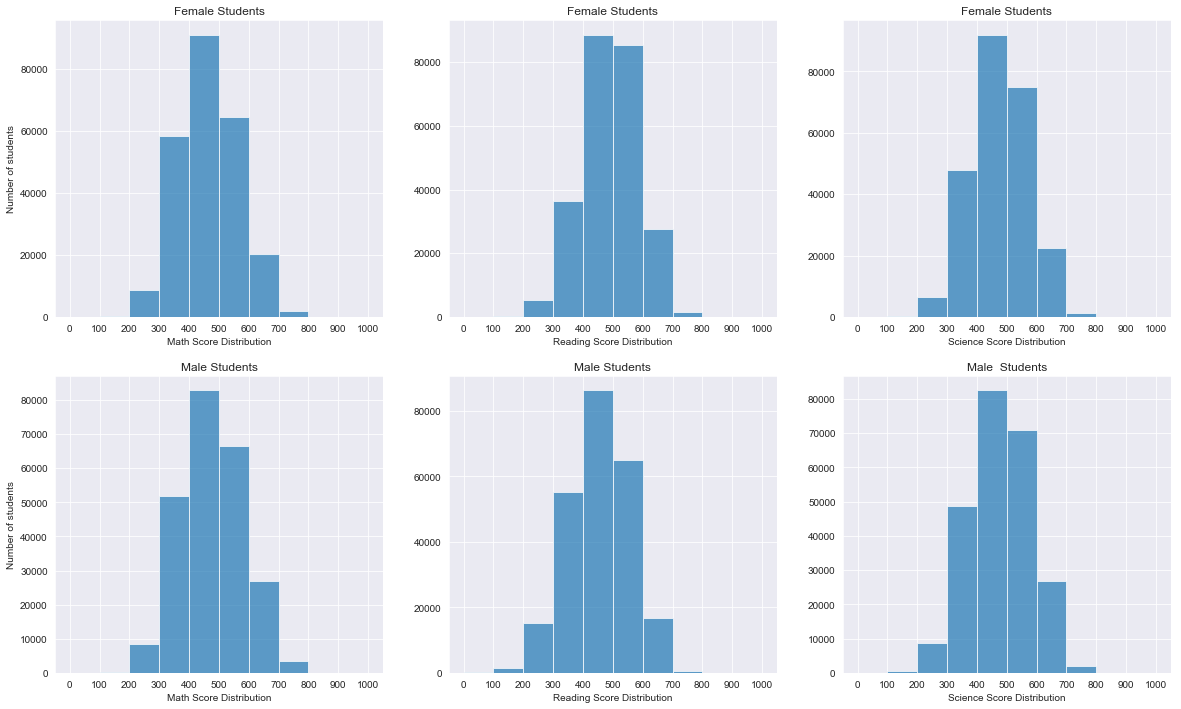

In [114]:
plt.figure(figsize = [20, 12])

bins_hist = np.arange(0, 1000 + 1, 100)
# 1st row  (OECD Countries)
plt.subplot(2, 3, 1)
plt.hist(female['math_average'], bins = bins_hist, alpha = 0.7);

plt.xticks(bins_hist)
plt.ylabel('Number of students')
plt.title("Female Students");
plt.xlabel('Math Score Distribution');
plt.subplot(2, 3, 2)
plt.hist(female['reading_average'], bins = bins_hist,  alpha = 0.7);

plt.xticks(bins_hist)
plt.xlabel('Reading Score Distribution');
plt.title("Female Students");

plt.subplot(2, 3, 3)
plt.hist(female['science_average'], bins = bins_hist, alpha = 0.7);

plt.xticks(bins_hist)
plt.xlabel('Science Score Distribution');
plt.title("Female Students");

# 2nd row (Non OECD Countries)

plt.subplot(2, 3, 4)
plt.hist(male['math_average'], bins = bins_hist, alpha = 0.7);

plt.xticks(bins_hist)
plt.xlabel('Math Score Distribution');
plt.ylabel('Number of students')
plt.title("Male Students");

plt.subplot(2, 3, 5)
plt.hist(male['reading_average'], bins = bins_hist,  alpha = 0.7);

plt.xticks(bins_hist)
plt.xlabel('Reading Score Distribution');
plt.title("Male Students");

plt.subplot(2, 3, 6)
plt.hist(male['science_average'], bins = bins_hist, alpha = 0.7);

plt.xticks(bins_hist)
plt.xlabel('Science Score Distribution');
plt.title("Male  Students");

## Computer Time Distribution

Reviens sur ca plus tard. pour le moment on comment le survey truc

In [106]:
# fill missing values with df_cognition['Computer_time'].describe(), df_cognition['Computer_time'].mode()

(count    297074.000000
 mean         50.895996
 std          40.987895
 min           0.000000
 25%          19.000000
 50%          39.000000
 75%          71.000000
 max         206.000000
 Name: Computer_time, dtype: float64, 0    39.0
 dtype: float64)

In [128]:
Non_OECD_PC = Non_OECD['Computer_time'].dropna()
Non_OECD_PC.count()

62596

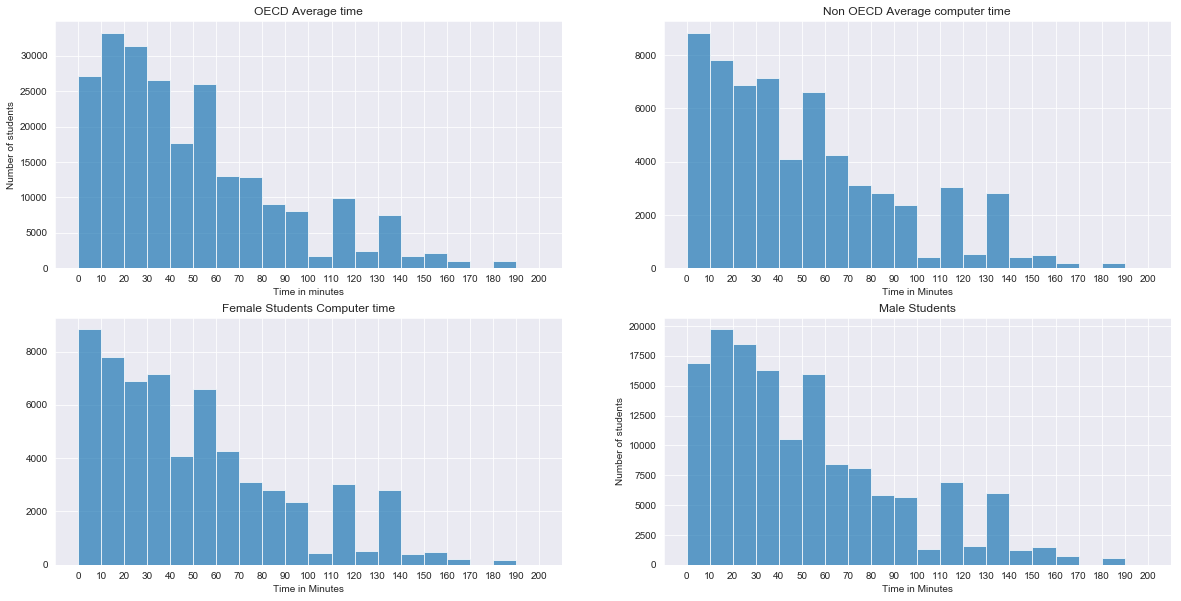

In [131]:
# df_cognition['Computer_time'].hist();
# plt.title("computer time")
# plt.xlabel("Time in Minutes")
# plt.ylabel("number of students");

############### utilise ces bar rapprochee pour OECD and non_OECD

plt.figure(figsize = [20, 10])

bins_hist = np.arange(0,210, 10)
# 1st row  
plt.subplot(2, 2, 1)
plt.hist(OECD['Computer_time'], bins = bins_hist, alpha = 0.7);
plt.xticks(bins_hist)
plt.ylabel('Number of students')
plt.title("OECD Average time");
plt.xlabel('Time in minutes');


plt.subplot(2, 2, 2)
plt.hist(Non_OECD['Computer_time'], bins = bins_hist,  alpha = 0.7);
plt.xticks(bins_hist)
plt.xlabel('Time in Minutes');
plt.title("Non OECD Average computer time");

# 2nd row 
plt.subplot(2, 2, 3)
plt.hist(Non_OECD_PC, bins = bins_hist, alpha = 0.7);
plt.xticks(bins_hist)
plt.xlabel('Time in Minutes');
plt.title("Female Students Computer time");


plt.subplot(2, 2, 4)
plt.hist(male['Computer_time'], bins = bins_hist, alpha = 0.7);
plt.xticks(bins_hist)
plt.xlabel('Time in Minutes');
plt.ylabel('Number of students')
plt.title("Male Students");

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

## Cognitive Activity

In [179]:
# def show_unique_values(df, var_list):
#     for var in var_list:
#         print(var, ' Unique Values:\n', df[var].unique(), '\n')
# show_unique_values(df_cognition, df_cognition.columns.tolist())

In [184]:
df_cognition.head()

,country,OECD,international_grade,national_study_program,gender,number_books,Learning_strategies_1,Learning_strategies_2,CA_TeacherEncouragesToReflectProblems,CA_GivesProblemThatRequireToThink,CA_AsksToUseOwnProcedures,CA_PresentsProblemsWithNoObviousSolutions,CA_PresentsProblemsInDifferentContexts,CA_HelpsLearnFromMistakes,CA_AsksForExplanation,CA_ApplyWhatTheyLearned,CA_ProblemWithMultipleSolutions,Computer_time,math_average,reading_average,science_average
0,Albania,Non-OECD,10,1.0,Female,0-10 books,NaN,NaN,Always or almost always,Sometimes,Never or rarely,Always or almost always,Always or almost always,Always or almost always,Always or almost always,Often,Often,NaN,366.18634,261.01424,371.91348
1,Albania,Non-OECD,10,1.0,Female,201-500 books,relating to known,Improve understanding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470.56396,384.68832,478.12382
2,Albania,Non-OECD,9,1.0,Female,More than 500 books,Most important,Improve understanding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,505.53824,405.18154,486.60946
3,Albania,Non-OECD,9,1.0,Female,11-25 books,relating to known,new ways,Always or almost always,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Never or rarely,NaN,449.45476,477.46376,453.97240
4,Albania,Non-OECD,9,1.0,Female,101-200 books,NaN,NaN,Always or almost always,Often,Sometimes,Often,Often,Often,Always or almost always,Often,Often,NaN,385.50398,256.01010,367.15778


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

## References:
* PISA 2012 contest winner: http://mi2.mini.pw.edu.pl:8080/SmarterPoland/PISAcontest/
* What is PISA: http://www.oecd.org/pisa/
* OECD: https://en.wikipedia.org/wiki/OECD
* PISA 2012 Countries : http://www.oecd.org/pisa/aboutpisa/pisa-2012-participants.htm
* PISA 2012 Data analysis Manual:http://archivos.agenciaeducacion.cl/Manual_de_Analisis_de_datos_SPSS_version_ingles.pdf
* PISA Data Exploration : https://github.com/brunoassisp/PISA-Data-Viz-project/blob/master/PISA_EDA.ipynb
* Jasccyang github repository : https://github.com/jasccyang/PISA2012/blob/master/Reducing%20File%20Size.ipynb
* Seby Sbirna Github repository: https://github.com/seby-sbirna/Data-Analyst-Nanodegree-Project-Portfolio/blob/master/Project%205%20-%20Communicate%20Data%20Findings/Project%205%20-%20Sebastian%20Sbirna.ipynb
* Visualization: https://www.researchgate.net/figure/Responses-to-Relating-to-your-last-five-publications-how-often-did-you-incorporate-the_fig1_328394497
* Udacity Classroom: https://classroom.udacity.com/nanodegrees/nd002/parts/9f7e8991-8bfb-4103-8307-3b6f93f0ecc7
* BarPlot with matplotlib: https://towardsdatascience.com/data-science-with-python-intro-to-data-visualization-and-matplotlib-5f799b7c6d82
* Pivot table: https://www.dataquest.io/blog/pandas-pivot-table
* Pandas stack:https://stackoverflow.com/questions/49098380/pandas-condense-survey-results